In [1]:
%load_ext autoreload
%autoreload 2
%cd ..

import numpy as np
import matplotlib.pyplot as plt
from src.ortools_solver import CVRP_solver
from src.utils import random_choose_candidate, distance_calculator, calculate_distance_matrix, show_matrix, get_optimized_sequence, print_command
from src.QAP_solver import calculate_T, CVRP_QAP
import pygmtools as pygm

/mnt/c/Users/runzh/OneDrive/Documents/2025/pipette_scheduling


/home/roger/miniforge3/envs/pipette_opt/lib/python3.9/site-packages/IPython/core/magics/osm.py:417: UserWarning: using dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]
/home/roger/miniforge3/envs/pipette_opt/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
D = np.ones((96,96))
for i in range(96):
    for j in range(96):
        if i//8 == j//8:
            if i-j == -1:
                D[i,j] = 0

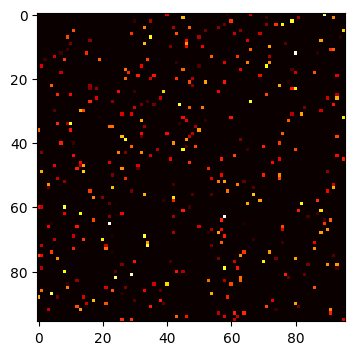

In [25]:
# generate the random addition matrix
# row is the source, column is the destination
a= np.eye(96)
a = random_choose_candidate(96,96,4)
show_matrix(a)
# randomly shuffle the rows
#np.random.shuffle(a)
# binarize the matrix as 0 and 1
a[a>0] = 1

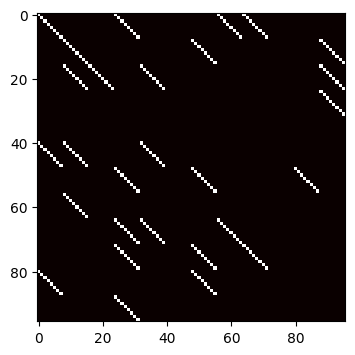

In [38]:
# generate the non-symmetric matrix
# devide a 96*96 matrix into 12*12 8*8 matrix
# randomly choose n matrix to add a diagonal matrix
a = np.zeros((96,96))
# randomly pick n number from 0 to 144
picked_submatrix = np.random.choice(144, 28, replace=False)
n = 0
for i in range(12):
    for j in range(12):
        if n in picked_submatrix:
            a[i*8:(i+1)*8, j*8:(j+1)*8] = np.eye(8)
        n += 1
show_matrix(a)

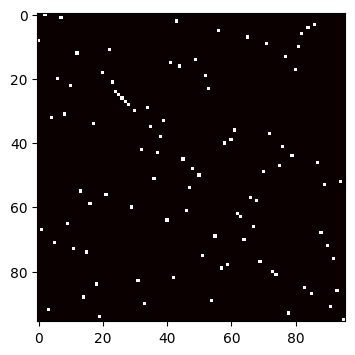

In [5]:
column_permutation = np.eye(96)
# Function to swap two columns in a matrix
def swap_columns(matrix, col1, col2):
    matrix[:, [col1, col2]] = matrix[:, [col2, col1]]

# pick an integer from 0 to 10 with gaussian distribution
for i in range(20):
    num_permutation = np.random.normal(5, 2)
    num_permutation = int(num_permutation)
    # randomly swipe two columns n times
    for j in range(num_permutation):
        exchange_columns = np.random.choice(96, 2, replace=False)
        swap_columns(column_permutation, exchange_columns[0], exchange_columns[1])
show_matrix(column_permutation)

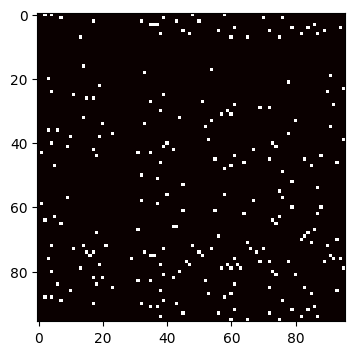

In [6]:
a = np.dot(a, column_permutation)
show_matrix(a)

In [27]:
# generate the job pair
jobs = np.argwhere(a)
volume = [a[i,j] for i,j in jobs]
volume = np.array(volume)
#distance_matrix = calculate_distance_matrix(jobs)
#S,E = calculate_S_E(jobs)
#D_prime = calculate_D_prime(D, S, E)

In [30]:
test_cost, test_P, new_jobs, test_seq = CVRP_QAP(jobs, iteration=5)

iter=0, cost=355.0 after CVRP
iter=0, cost=355.0 after QAP
iter=1, cost=346.0 after CVRP
iter=1, cost=345.0 after QAP
iter=2, cost=352.0 after CVRP
iter=2, cost=352.0 after QAP
iter=3, cost=345.0 after CVRP
iter=3, cost=345.0 after QAP
iter=4, cost=354.0 after CVRP
iter=4, cost=354.0 after QAP
solution cost=350


In [31]:
distance_matrix = calculate_distance_matrix(new_jobs)
VRP_distance, VRP_recorder = CVRP_solver(distance_matrix)
recorder = get_optimized_sequence(VRP_recorder)

In [32]:
sequence = recorder.flatten()
sequence = sequence[sequence!=-1] -1
command_line = print_command(sequence, new_jobs)
np.savetxt('optimized_command_line.csv',command_line,fmt='%s',delimiter=',')

In [8]:
jobs = np.argwhere(a)
unoptimized_command_line = print_command(np.array(range(jobs.shape[0])),jobs)
np.savetxt('unoptimized_command_line.csv',unoptimized_command_line,fmt='%s',delimiter=',')

In [33]:
stat = []
for i in range(1,20):
    experiments = random_choose_candidate(96,96,i)
    jobs = np.argwhere(experiments)
    distance_matrix = calculate_distance_matrix(jobs)
    optimized_distance, _, new_jobs, recorder= CVRP_QAP(jobs,iteration=20)
    VRP_distance, _ = CVRP_solver(distance_matrix)
    non_optimized_distance = distance_calculator(jobs)
    stat.append((i,non_optimized_distance,optimized_distance, VRP_distance))
stat = np.array(stat)

/mnt/c/Users/runzh/OneDrive/Documents/2025/pipette_scheduling/src/utils.py:17: RuntimeWarning: invalid value encountered in divide
  random_vector = random_vector / random_vector.sum(axis=0, keepdims=1)


iter=0, cost=93.0 after CVRP
iter=0, cost=73.0 after QAP
iter=1, cost=74.0 after CVRP
iter=1, cost=72.0 after QAP
iter=2, cost=71.0 after CVRP
iter=2, cost=67.0 after QAP
iter=3, cost=64.0 after CVRP
iter=3, cost=63.0 after QAP
iter=4, cost=65.0 after CVRP
iter=4, cost=64.0 after QAP
iter=5, cost=67.0 after CVRP
iter=5, cost=67.0 after QAP
iter=6, cost=67.0 after CVRP
iter=6, cost=67.0 after QAP
iter=7, cost=67.0 after CVRP
iter=7, cost=67.0 after QAP
iter=8, cost=67.0 after CVRP
iter=8, cost=67.0 after QAP
iter=9, cost=67.0 after CVRP
iter=9, cost=67.0 after QAP
iter=10, cost=67.0 after CVRP
iter=10, cost=67.0 after QAP
iter=11, cost=67.0 after CVRP
iter=11, cost=67.0 after QAP
iter=12, cost=67.0 after CVRP
iter=12, cost=67.0 after QAP
iter=13, cost=67.0 after CVRP
iter=13, cost=67.0 after QAP
iter=14, cost=67.0 after CVRP
iter=14, cost=67.0 after QAP
iter=15, cost=67.0 after CVRP
iter=15, cost=67.0 after QAP
iter=16, cost=67.0 after CVRP
iter=16, cost=67.0 after QAP
iter=17, cost=67.

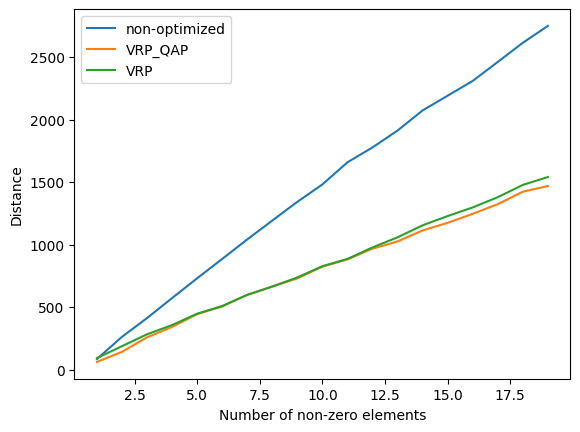

In [34]:
# plot the result
plt.plot(stat[:,0],stat[:,1],label='non-optimized')
plt.plot(stat[:,0],stat[:,2],label='VRP_QAP')
plt.plot(stat[:,0],stat[:,3],label='VRP')
plt.legend()
plt.xlabel('Number of non-zero elements')
plt.ylabel('Distance')
plt.show()

In [35]:
def matrix_to_sequence(matrix,optimization_iteration=5):
    jobs = np.argwhere(matrix)
    distance_matrix = calculate_distance_matrix(jobs)
    optimized_distance, P, new_jobs, seq = CVRP_QAP(jobs,iteration=optimization_iteration)
    non_optimized_distance = distance_calculator(jobs)
    return non_optimized_distance, optimized_distance

iter=0, cost=0.0 after CVRP
iter=0, cost=0.0 after QAP
iter=1, cost=0.0 after CVRP
iter=1, cost=0.0 after QAP
iter=2, cost=0.0 after CVRP
iter=2, cost=0.0 after QAP
iter=3, cost=0.0 after CVRP
iter=3, cost=0.0 after QAP
iter=4, cost=0.0 after CVRP
iter=4, cost=0.0 after QAP
solution cost=0


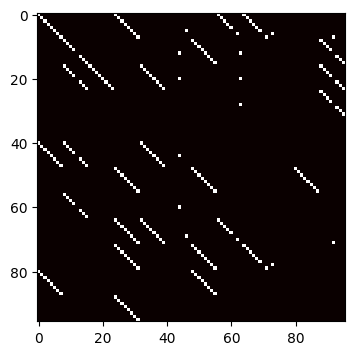

iter=0, cost=74.0 after CVRP
iter=0, cost=65.0 after QAP
iter=1, cost=33.0 after CVRP
iter=1, cost=33.0 after QAP
iter=2, cost=30.0 after CVRP
iter=2, cost=30.0 after QAP
iter=3, cost=38.0 after CVRP
iter=3, cost=38.0 after QAP
iter=4, cost=31.0 after CVRP
iter=4, cost=31.0 after QAP
solution cost=17


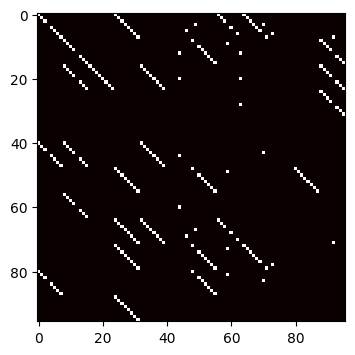

iter=0, cost=68.0 after CVRP
iter=0, cost=63.0 after QAP
iter=1, cost=65.0 after CVRP
iter=1, cost=65.0 after QAP
iter=2, cost=65.0 after CVRP
iter=2, cost=65.0 after QAP
iter=3, cost=65.0 after CVRP
iter=3, cost=65.0 after QAP
iter=4, cost=65.0 after CVRP
iter=4, cost=65.0 after QAP
solution cost=40


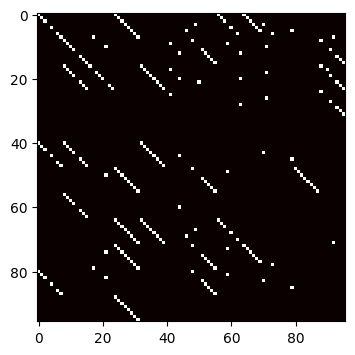

iter=0, cost=117.0 after CVRP
iter=0, cost=111.0 after QAP
iter=1, cost=104.0 after CVRP
iter=1, cost=103.0 after QAP
iter=2, cost=79.0 after CVRP
iter=2, cost=79.0 after QAP
iter=3, cost=70.0 after CVRP
iter=3, cost=70.0 after QAP
iter=4, cost=70.0 after CVRP
iter=4, cost=70.0 after QAP
solution cost=43


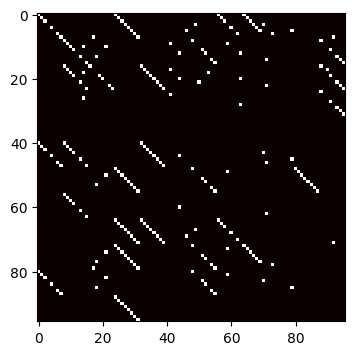

iter=0, cost=134.0 after CVRP
iter=0, cost=127.0 after QAP
iter=1, cost=114.0 after CVRP
iter=1, cost=106.0 after QAP
iter=2, cost=82.0 after CVRP
iter=2, cost=79.0 after QAP
iter=3, cost=57.0 after CVRP
iter=3, cost=54.0 after QAP
iter=4, cost=43.0 after CVRP
iter=4, cost=42.0 after QAP
solution cost=31


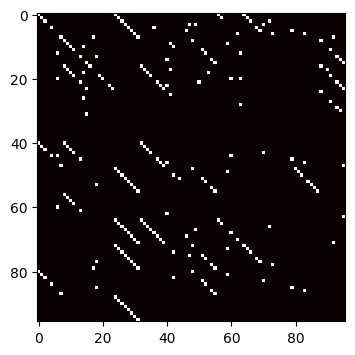

iter=0, cost=141.0 after CVRP
iter=0, cost=130.0 after QAP
iter=1, cost=122.0 after CVRP
iter=1, cost=119.0 after QAP
iter=2, cost=106.0 after CVRP
iter=2, cost=106.0 after QAP
iter=3, cost=110.0 after CVRP
iter=3, cost=109.0 after QAP
iter=4, cost=93.0 after CVRP
iter=4, cost=93.0 after QAP
solution cost=81


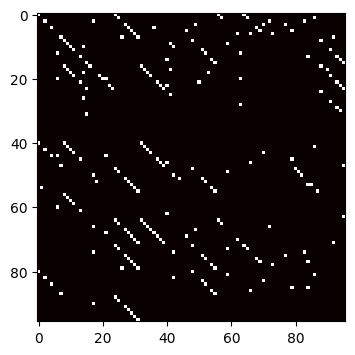

iter=0, cost=164.0 after CVRP
iter=0, cost=156.0 after QAP
iter=1, cost=118.0 after CVRP
iter=1, cost=116.0 after QAP
iter=2, cost=137.0 after CVRP
iter=2, cost=136.0 after QAP
iter=3, cost=126.0 after CVRP
iter=3, cost=123.0 after QAP
iter=4, cost=119.0 after CVRP
iter=4, cost=119.0 after QAP
solution cost=112


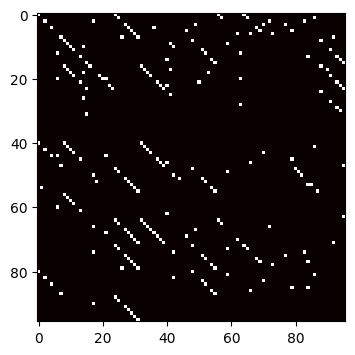

iter=0, cost=164.0 after CVRP
iter=0, cost=156.0 after QAP
iter=1, cost=118.0 after CVRP
iter=1, cost=116.0 after QAP
iter=2, cost=137.0 after CVRP
iter=2, cost=136.0 after QAP
iter=3, cost=126.0 after CVRP
iter=3, cost=123.0 after QAP
iter=4, cost=119.0 after CVRP
iter=4, cost=119.0 after QAP
solution cost=112


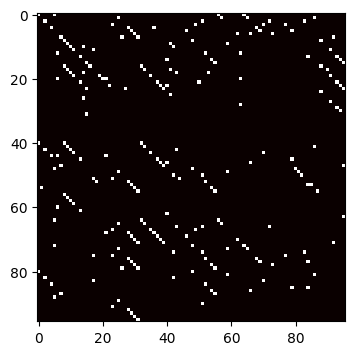

iter=0, cost=191.0 after CVRP
iter=0, cost=183.0 after QAP
iter=1, cost=160.0 after CVRP
iter=1, cost=158.0 after QAP
iter=2, cost=153.0 after CVRP
iter=2, cost=149.0 after QAP
iter=3, cost=151.0 after CVRP
iter=3, cost=145.0 after QAP
iter=4, cost=131.0 after CVRP
iter=4, cost=129.0 after QAP
solution cost=116


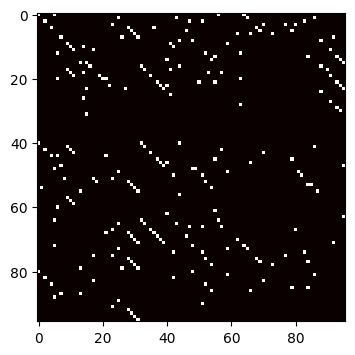

iter=0, cost=196.0 after CVRP
iter=0, cost=184.0 after QAP
iter=1, cost=160.0 after CVRP
iter=1, cost=160.0 after QAP
iter=2, cost=153.0 after CVRP
iter=2, cost=151.0 after QAP
iter=3, cost=144.0 after CVRP
iter=3, cost=143.0 after QAP
iter=4, cost=153.0 after CVRP
iter=4, cost=149.0 after QAP
solution cost=132


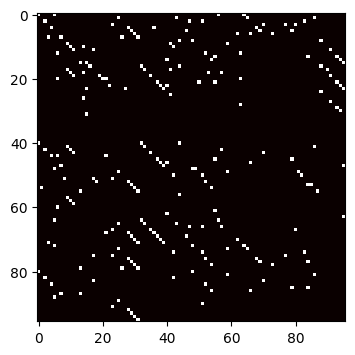

iter=0, cost=193.0 after CVRP
iter=0, cost=184.0 after QAP
iter=1, cost=168.0 after CVRP
iter=1, cost=159.0 after QAP
iter=2, cost=152.0 after CVRP
iter=2, cost=149.0 after QAP
iter=3, cost=143.0 after CVRP
iter=3, cost=142.0 after QAP
iter=4, cost=142.0 after CVRP
iter=4, cost=142.0 after QAP
solution cost=130


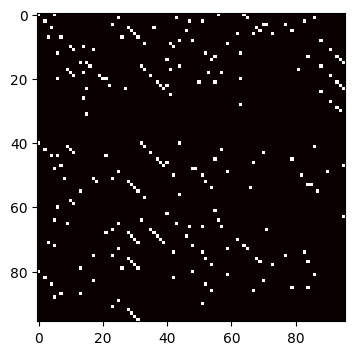

iter=0, cost=200.0 after CVRP
iter=0, cost=182.0 after QAP
iter=1, cost=168.0 after CVRP
iter=1, cost=167.0 after QAP
iter=2, cost=152.0 after CVRP
iter=2, cost=150.0 after QAP
iter=3, cost=161.0 after CVRP
iter=3, cost=160.0 after QAP
iter=4, cost=155.0 after CVRP
iter=4, cost=153.0 after QAP
solution cost=143


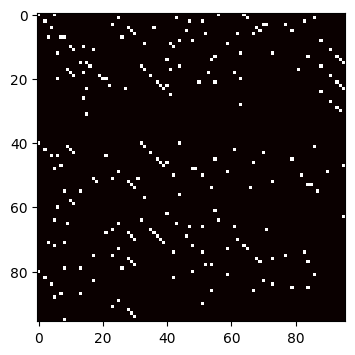

iter=0, cost=211.0 after CVRP
iter=0, cost=197.0 after QAP
iter=1, cost=170.0 after CVRP
iter=1, cost=167.0 after QAP
iter=2, cost=159.0 after CVRP
iter=2, cost=155.0 after QAP
iter=3, cost=161.0 after CVRP
iter=3, cost=161.0 after QAP
iter=4, cost=156.0 after CVRP
iter=4, cost=157.0 after QAP
solution cost=150


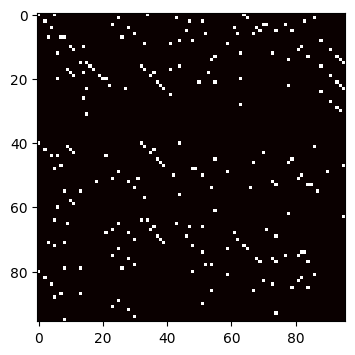

iter=0, cost=206.0 after CVRP
iter=0, cost=197.0 after QAP
iter=1, cost=187.0 after CVRP
iter=1, cost=182.0 after QAP
iter=2, cost=183.0 after CVRP
iter=2, cost=171.0 after QAP
iter=3, cost=156.0 after CVRP
iter=3, cost=154.0 after QAP
iter=4, cost=153.0 after CVRP
iter=4, cost=152.0 after QAP
solution cost=130


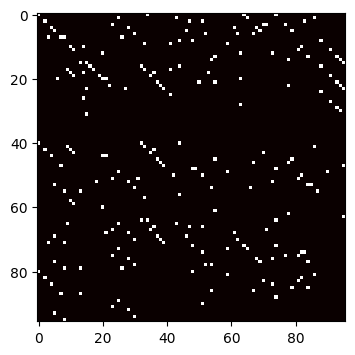

iter=0, cost=204.0 after CVRP
iter=0, cost=192.0 after QAP
iter=1, cost=172.0 after CVRP
iter=1, cost=172.0 after QAP
iter=2, cost=164.0 after CVRP
iter=2, cost=157.0 after QAP
iter=3, cost=165.0 after CVRP
iter=3, cost=162.0 after QAP
iter=4, cost=151.0 after CVRP
iter=4, cost=151.0 after QAP
solution cost=143


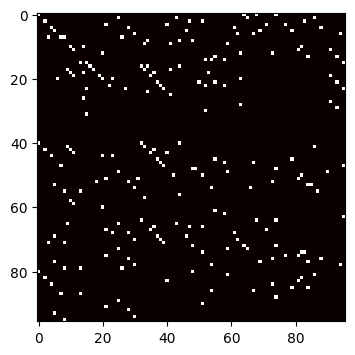

iter=0, cost=214.0 after CVRP
iter=0, cost=201.0 after QAP
iter=1, cost=192.0 after CVRP
iter=1, cost=184.0 after QAP
iter=2, cost=156.0 after CVRP
iter=2, cost=156.0 after QAP
iter=3, cost=156.0 after CVRP
iter=3, cost=156.0 after QAP
iter=4, cost=156.0 after CVRP
iter=4, cost=156.0 after QAP
solution cost=146


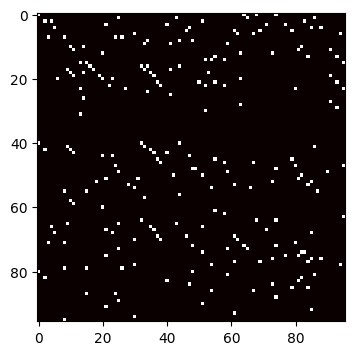

iter=0, cost=209.0 after CVRP
iter=0, cost=196.0 after QAP
iter=1, cost=181.0 after CVRP
iter=1, cost=176.0 after QAP
iter=2, cost=177.0 after CVRP
iter=2, cost=171.0 after QAP
iter=3, cost=151.0 after CVRP
iter=3, cost=151.0 after QAP
iter=4, cost=151.0 after CVRP
iter=4, cost=151.0 after QAP
solution cost=143


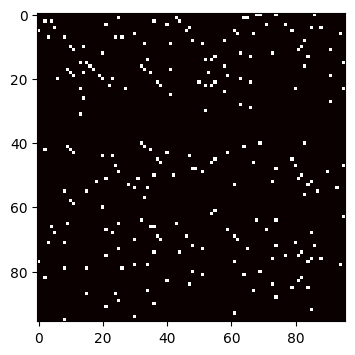

iter=0, cost=207.0 after CVRP
iter=0, cost=199.0 after QAP
iter=1, cost=197.0 after CVRP
iter=1, cost=189.0 after QAP
iter=2, cost=175.0 after CVRP
iter=2, cost=172.0 after QAP
iter=3, cost=164.0 after CVRP
iter=3, cost=160.0 after QAP
iter=4, cost=157.0 after CVRP
iter=4, cost=154.0 after QAP
solution cost=140


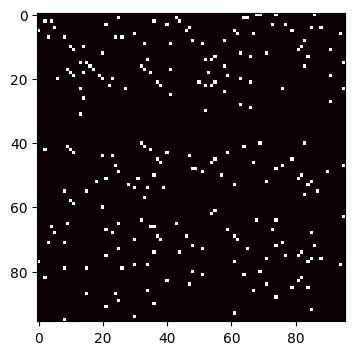

iter=0, cost=211.0 after CVRP
iter=0, cost=201.0 after QAP
iter=1, cost=196.0 after CVRP
iter=1, cost=196.0 after QAP
iter=2, cost=185.0 after CVRP
iter=2, cost=179.0 after QAP
iter=3, cost=171.0 after CVRP
iter=3, cost=171.0 after QAP
iter=4, cost=171.0 after CVRP
iter=4, cost=171.0 after QAP
solution cost=162


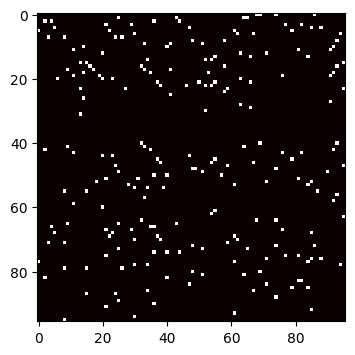

iter=0, cost=214.0 after CVRP
iter=0, cost=204.0 after QAP
iter=1, cost=194.0 after CVRP
iter=1, cost=191.0 after QAP
iter=2, cost=185.0 after CVRP
iter=2, cost=183.0 after QAP
iter=3, cost=183.0 after CVRP
iter=3, cost=177.0 after QAP
iter=4, cost=173.0 after CVRP
iter=4, cost=171.0 after QAP
solution cost=168


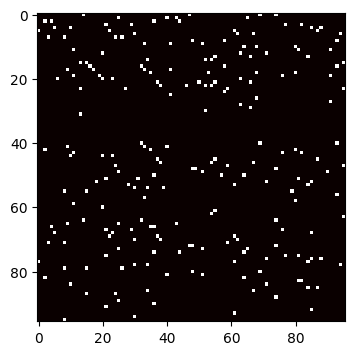

iter=0, cost=219.0 after CVRP
iter=0, cost=214.0 after QAP
iter=1, cost=196.0 after CVRP
iter=1, cost=193.0 after QAP
iter=2, cost=197.0 after CVRP
iter=2, cost=195.0 after QAP
iter=3, cost=195.0 after CVRP
iter=3, cost=192.0 after QAP
iter=4, cost=185.0 after CVRP
iter=4, cost=185.0 after QAP
solution cost=177


In [39]:
column_permutation = np.eye(96)
# Function to swap two columns in a matrix
def swap_columns(matrix, col1, col2):
    matrix[:, [col1, col2]] = matrix[:, [col2, col1]]
# record the optimized distance and non-optimized distance in each permutation
update_a = a
stat = []
non_optimized_distance, optimized_distance = matrix_to_sequence(update_a)
stat.append((0,non_optimized_distance,optimized_distance))
# pick an integer from 0 to 10 with gaussian distribution
for i in range(20):
    num_permutation = np.random.normal(5, 2)
    num_permutation = int(num_permutation)
    # randomly swipe two columns n times
    for j in range(num_permutation):
        exchange_columns = np.random.choice(96, 2, replace=False)
        swap_columns(column_permutation, exchange_columns[0], exchange_columns[1])
    update_a = np.dot(a, column_permutation)
    show_matrix(update_a)
    non_optimized_distance, optimized_distance = matrix_to_sequence(update_a)
    stat.append((i+1,non_optimized_distance,optimized_distance))
stat = np.array(stat)

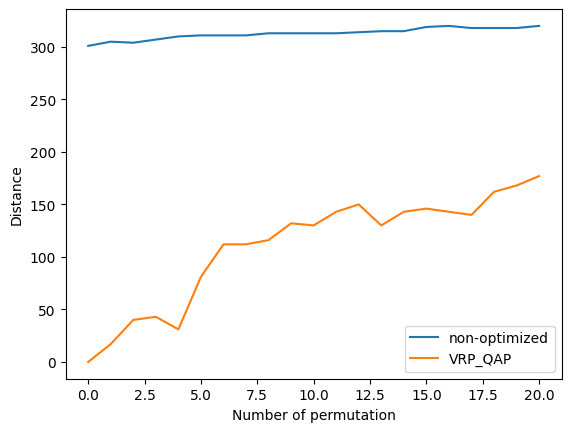

In [40]:
# plot the result
plt.plot(stat[:,0],stat[:,1],label='non-optimized')
plt.plot(stat[:,0],stat[:,2],label='VRP_QAP')
plt.legend()
plt.xlabel('Number of permutation')
plt.ylabel('Distance')
plt.show()
